# Statistical Analysis of Marketing Data 


####  Business Problem : 

* Test if Income of  'Australia', 'India' and 'Canada' has same mean?
* Test whether wine purchase across Australia, India and Canada has the same mean ? 
* Is there association between Marital Situation and Income? 
* Is age group and number of Web visits per month independent?


This notebook focuses on accomplishing the following task: 
* Data Preparation and Cleaning 
* Normality Test for numeric attributes
* Parametric and Non-Parametric test for samples
* Correlation between numeric attributes 



## Data Preparation and Cleaning 

In this section we accomplish the following: 
* Review data. 
* Check for duplicates duplicates and remove if any.
* Feature Engineering
* Look for missing values and perform imputation. 
 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
from plotly import tools                       
from plotly.offline import iplot

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head() 

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]


Column Details:
<pre>
<b>ID:</b> Customer's Unique Identifier
<b>Year_Birth:</b> Customer's Birth Year
<b>Education:</b> Customer's education level
<b>Marital_Status:</b> Customer's marital status
<b>Income:</b> Customer's yearly household income
<b>Kidhome:</b> Number of children in customer's household
<b>Teenhome:</b> Number of teenagers in customer's household
<b>Dt_Customer:</b> Date of customer's enrollment with the company
<b>Recency:</b> Number of days since customer's last purchase
<b>MntFruits:</b> Amount spent on fruits in the last 2 years
<b>MntMeatProducts:</b> Amount spent on meat in the last 2 years
<b>MntFishProducts:</b> Amount spent on fish in the last 2 years
<b>MntSweetProducts:</b> Amount spent on sweets in the last 2 years
<b>MntGoldProds:</b> Amount spent on gold in the last 2 years
<b>NumDealsPurchases:</b> Number of purchases made with a discount
<b>NumWebPurchases:</b> Number of purchases made through the company's web site
<b>NumCatalogPurchases:</b> Number of purchases made using a catalogue
<b>NumStorePurchases:</b> Number of purchases made directly in stores
<b>NumWebVisitsMonth:</b> Number of visits to company's web site in the last month
<b>AcceptedCmp1:</b> 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
<b>AcceptedCmp2:</b> 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
<b>AcceptedCmp3:</b> 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
<b>AcceptedCmp4:</b> 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
<b>AcceptedCmp5:</b> 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable) 
<b>Response:</b> 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)
<b>Complain:</b> 1 if customer complained in the last 2 years, 0 otherwise
<b>Country:</b> Customer's location  
</pre>

In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [950]:
def space():
    print(" ")
    print("---------------------------------------------------------------")
    print(" ") 

def basic_exploration(steps):
    for i in steps:
        print(i)
        space()

steps = [df.shape, df.duplicated().any(), df.isnull().sum(), df.nunique()]
basic_exploration(steps)  

(2240, 28)
 
---------------------------------------------------------------
 
False
 
---------------------------------------------------------------
 
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
 
---------------------------------------------------------------
 
ID                     2240
Year_Birth

In [789]:
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

#### Observation:
* There isn't duplicate values. 
* Income has null values. 
* All are int and float values.  
* "Income" has a space before it's name and \$ symbol which can be problematic.

 
#### Remove \$ and change the datatype to "int".  


In [3]:
df.rename(columns={' Income ':'Income'},inplace=True)
df["Income"] = df["Income"].str.replace("$","").str.replace(',', '')
df["Income"] = df["Income"].astype(float)                             

#### Create variables for indepth analysis.  

* "Age" is created based on birth year. 
* "Spending" refers to sum of all individual spendings. 
* "Marital_Situation" refers to grouping of marital status into single and in couple. 
* "Has_child" is created after combining teenhome and kidhome columns. 
* "Educational Years" represents approximate years spent on studies. 

In [4]:
df['Age']=2023-df['Year_Birth']
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts'] +df['MntSweetProducts']+df['MntGoldProds']
df['Marital_Situation']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple',
                                                      'Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df['Has_child'] = np.where(df.Kidhome+df.Teenhome > 0, 1, 0)
df['Educational_years']=df['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})

In [5]:
bins = [0,20,30,40,50,60,70,100]
labels = ['Teen', 'Young', 'Young Adult', 'Adult', 'Senior', 'Retired', 'Old Age']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [6]:
df.drop(columns = ['ID','Year_Birth'],inplace=True) 

In [703]:
# cols = ['Age','Income','Spending','Marital_Situation','Has_child','Educational_years', 'Education']

# Statistical Tests 

Statistical tests are used to analyze and draw inference from the data. The intent of the tests is to reject or accept the hypothesis posed based on confidence intervals.  

This sectione explores tests for numerical attributes, categorical attributes, categories VS coontinous attributes. 

## Numerical Attributes 

Test for numerical data performed includes: 
* <b>Normality Test</b>: Normality of the data columns are checked using visual normality checks using graphs and statistical Normality Test. 
* <b>Statistical Normality Test</b>: These test normaly includes three types for different use cases: 
    1. Shapiro-Wilk Test (only for guassian distribution). 
    2. D’Agostino’s K 2 Test (only for gaussian distribution)
    3. Anderson-Darling Test (for many other distributions)  
    
    We are experimenting with Shapiro-Wilk Test here. 
              

* <b>Correlation Between Numeric Attributes</b>
   * Spearman's Rank Correlation
* <b>Parametric Statistical Significance Test</b>
   * Analysis of Variance Test (ANOVA)
* <b>Non Parametric Statistical Significance Test</b>
   * Kruskal-Wallis H Test





In [507]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Spending',
       'Marital_Situation', 'Has_child', 'Educational_years'],
      dtype='object')

### 1. Visual Normality Checks
1. Histogram 
2. Quantile-Quantile plot 

In [7]:
cols = ['Age', 'Income', 'Spending', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']

In [8]:
sns.set()

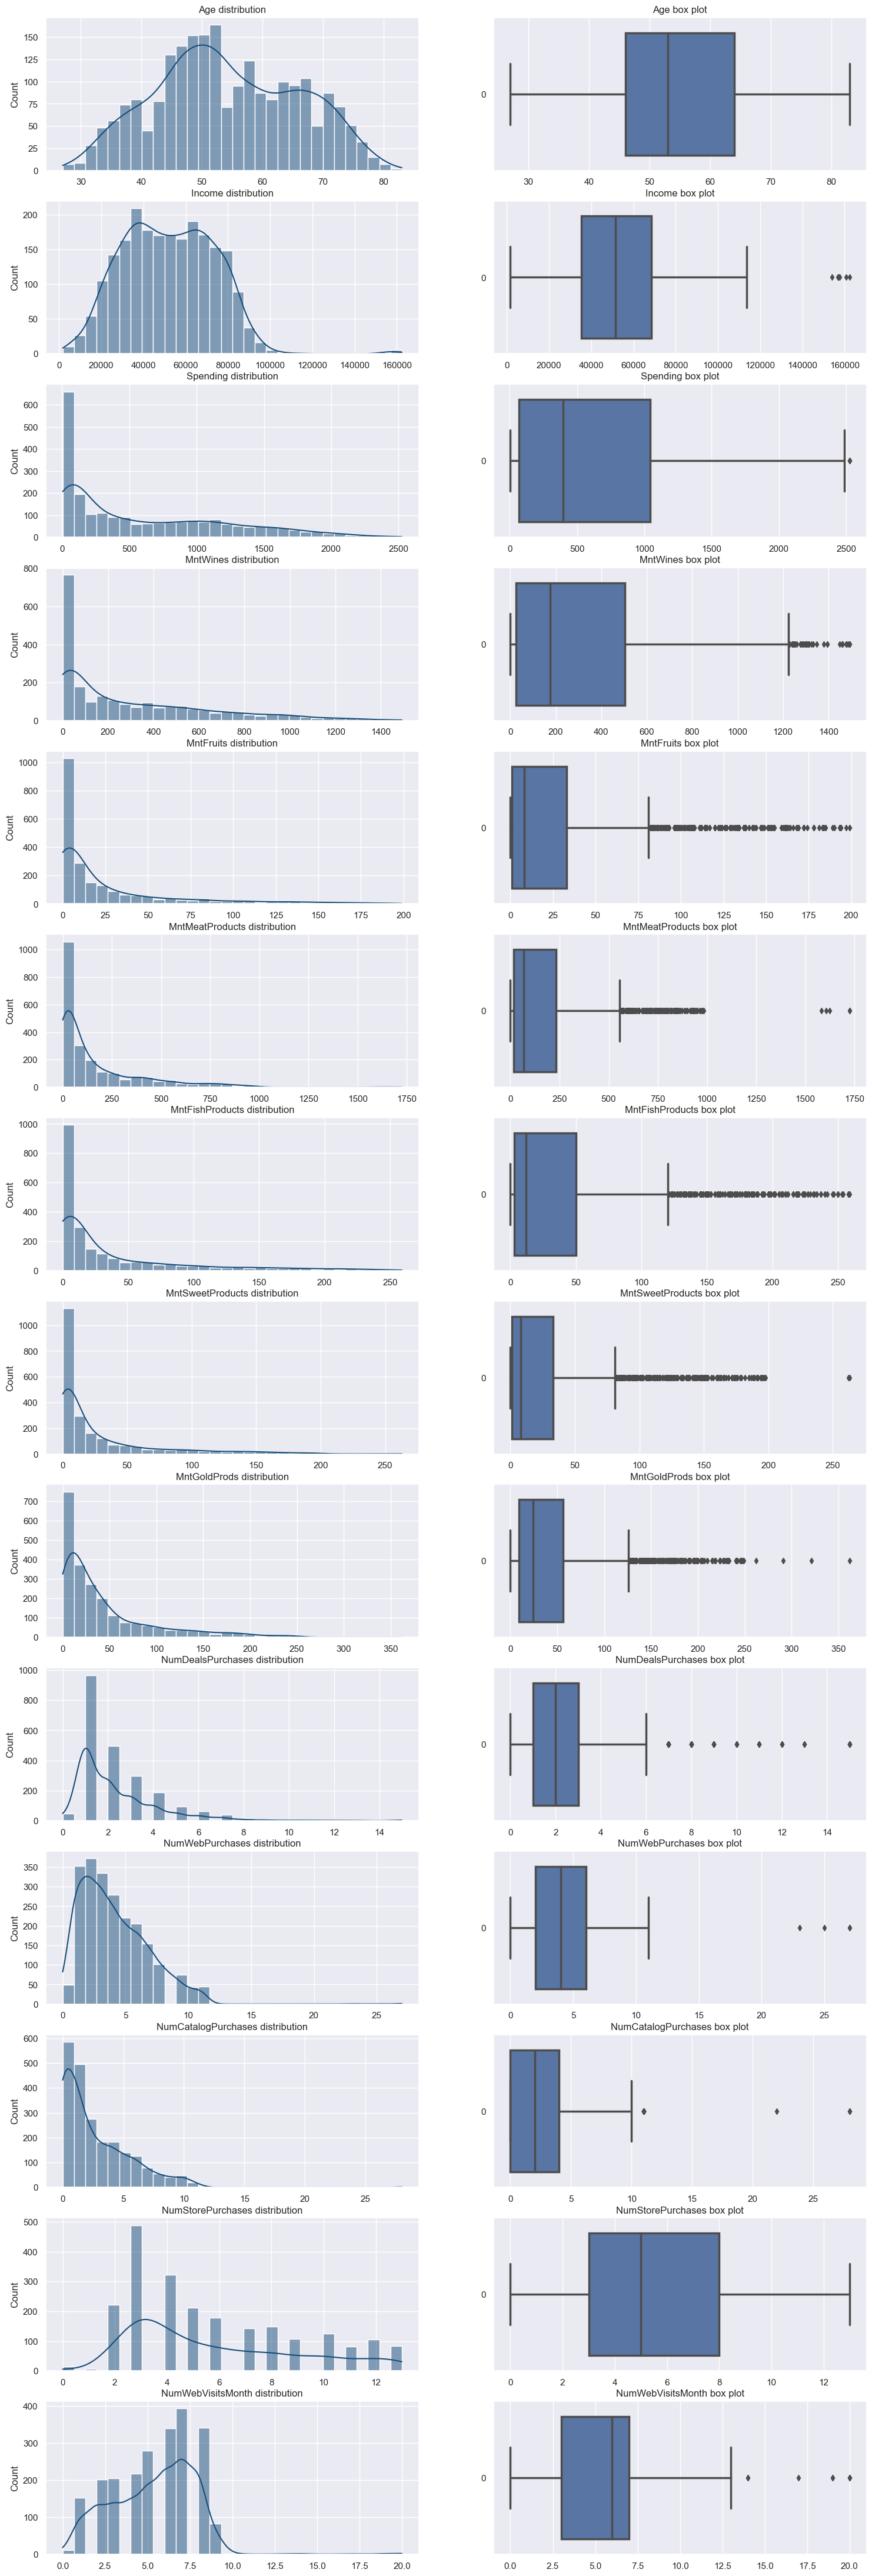

In [854]:
rows = len(cols)
colmns = 2

fig = plt.figure(1, (18, rows*4)) 
i=0 
for col in cols:
    i += 1 
    ax1 = plt.subplot(rows, colmns, i)
    sns.histplot(data=df, x=col, bins=30, kde=True, color='#154c79')
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
     

    i += 1
    ax3 = plt.subplot(rows, colmns,i)
    sns.boxplot(df[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    
    

In [9]:
df[cols].describe()

Age         Income     Spending     MntWines    MntFruits  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean     54.194196   52247.251354   605.798214   303.935714    26.302232   
std      11.984069   25173.076661   602.249288   336.597393    39.773434   
min      27.000000    1730.000000     5.000000     0.000000     0.000000   
25%      46.000000   35303.000000    68.750000    23.750000     1.000000   
50%      53.000000   51381.500000   396.000000   173.500000     8.000000   
75%      64.000000   68522.000000  1045.500000   504.250000    33.000000   
max     130.000000  666666.000000  2525.000000  1493.000000   199.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2240.000000      2240.000000       2240.000000   2240.000000   
mean        166.950000        37.525446         27.062946     44.021875   
std         225.715373        54.628979         41.280498     52.167439   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          67.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  
count        2240.000000        2240.000000  
mean            5.790179           5.316518  
std             3.250958           2.426645  
min             0.000000           0.000000  
25%             3.000000           3.000000  
50%             5.000000           6.000000  
75%             8.000000           7.000000  
max            13.000000          20.000000

* 'Age', 'Income' appears to be bimodal. 
* 'Spending', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases' are right skewed distribution. 
* NumWebVisitsMonth is left skewed. 

## Outlier Analysis  

* Analyse the outliers using tukey formula. 
* After observing the histogram, we will remove outliers from age, income. 

In [9]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75) 
    
    
    iqr = q3-q1 
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5 
   
    
    outliers = x[(x<min_range) | (x>max_range)] 
    return outliers 
 

In [736]:
df.iloc[list(tukey_outliers(df['Income']).index)]

Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
325   Graduation       Together  157146.0        0         0     4/29/13   
497          PhD        Married  160803.0        0         0      8/4/12   
527   Graduation       Together  666666.0        1         0      6/2/13   
731          PhD       Together  162397.0        1         1      6/3/13   
853       Master       Together  157733.0        1         0      6/4/13   
1826  Graduation       Divorced  153924.0        0         0      2/7/14   
1925         PhD        Married  156924.0        0         0     8/29/13   
2204         PhD        Married  157243.0        0         1      3/1/14   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
325        13         1          0             1725  ...             0   
497        21        55         16             1622  ...             0   
527        23         9         14               18  ...             0   
731        31        85          1               16  ...             0   
853        37        39          1                9  ...             0   
1826       81         1          1                1  ...             0   
1925       85         2          1                2  ...             0   
2204       98        20          2             1582  ...             0   

      AcceptedCmp2  Response  Complain  Country  Age  Spending  \
325              0         0         0       SA   46      1730   
497              0         0         0       US   41      1717   
527              0         0         0       SA   46        62   
731              0         0         0       SP   47       107   
853              0         0         0       SP   52        59   
1826             0         0         0       SP   48         6   
1925             0         0         0       CA   74         8   
2204             0         0         0      IND   50      1608   

      Marital_Situation  Has_child  Educational_years  
325           In couple          0                 12  
497           In couple          0                 21  
527           In couple          1                 12  
731           In couple          1                 21  
853           In couple          1                 18  
1826              Alone          0                 12  
1925          In couple          0                 21  
2204          In couple          1                 21  

[8 rows x 31 columns]

In [10]:
df = df.drop(df[df['Income'] >600000]['Income'].index).reset_index(drop=True)

In [738]:
# list(tukey_outliers(df['Age']).index)
df.iloc[list(tukey_outliers(df['Age']).index)]['Age']

513     130
826     124
2232    123
Name: Age, dtype: int64

In [739]:
df.iloc[list(tukey_outliers(df['Age']).index)] 

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
513   2n Cycle         Single  60182.0        0         1     5/17/14   
826        PhD       Together  83532.0        0         0     9/26/13   
2232  2n Cycle       Divorced  36640.0        1         0     9/26/13   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
513        23         8          0                5  ...             0   
826        36       755        144              562  ...             0   
2232       99        15          6                8  ...             0   

      AcceptedCmp2  Response  Complain  Country  Age  Spending  \
513              0         0         0       SA  130        22   
826              0         0         0       SP  124      1853   
2232             0         0         1      IND  123        65   

      Marital_Situation  Has_child  Educational_years  
513               Alone          1                  8  
826           In couple          0                 21  
2232              Alone          1                  8  

[3 rows x 31 columns]

In [11]:
df = df.drop(tukey_outliers(df['Age']).index).reset_index(drop=True)                                             

### Multiple Imputation of Income 

* The income though appears to be normal, is sensitive to Shapiro-Wilk test. After experimentation, income is imputed with multiple imputations.

#### Exploring Income

<Axes: xlabel='Income', ylabel='Spending'>

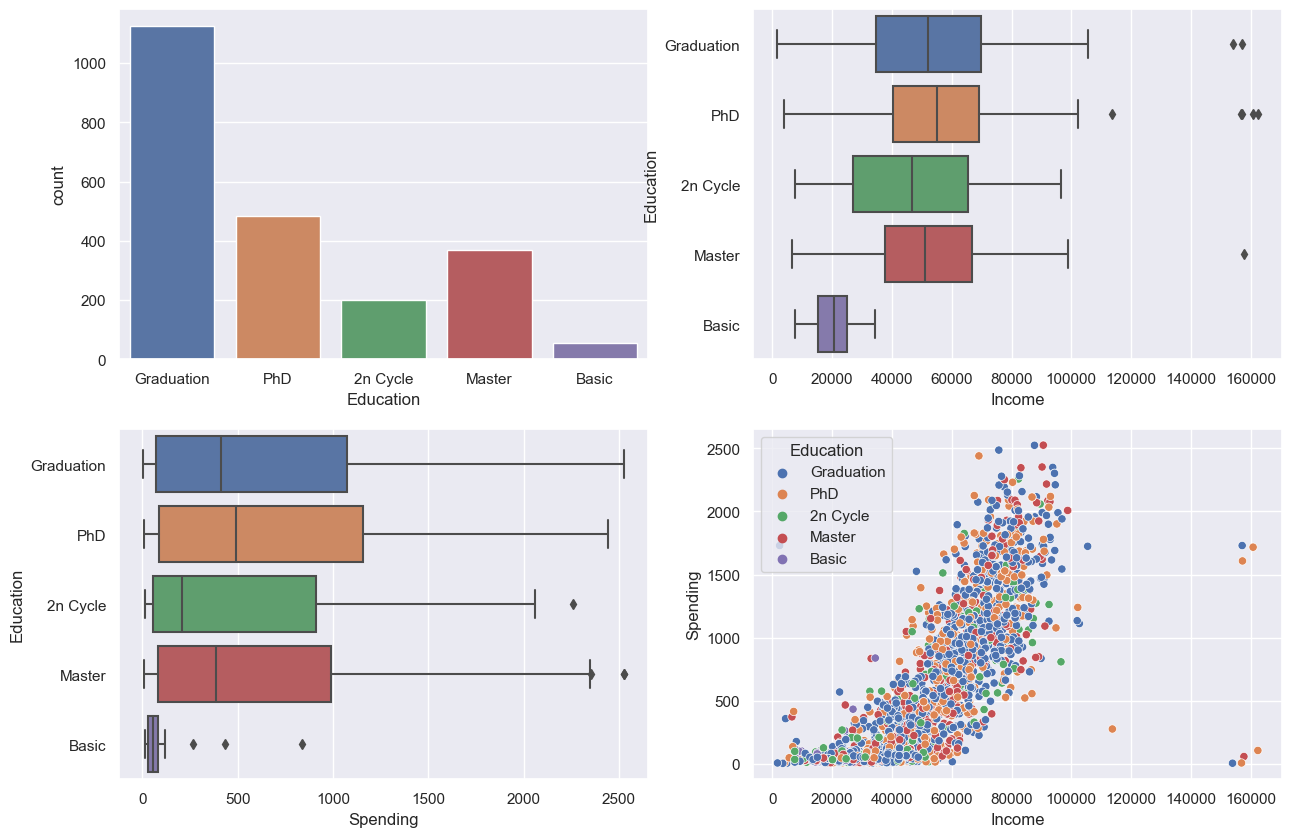

In [1046]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(df, x="Education",ax=axes[0,0]) 
sns.boxplot(data=df, x="Income", y="Education", ax=axes[0,1])
sns.boxplot(data=df, x="Spending", y="Education",ax=axes[1,0] )
sns.scatterplot(data=df, x="Income", y="Spending", hue="Education", ax=axes[1,1])


* PhD, Graduation and master qualifications are higher.  
* Income of PhD, Graduation and master qualification is similar. 
* 2n has slightly broard spectrum, spread across lower ranges. 
* Basic has lower income range.
* Spending and Income has cubical like graph.

<Axes: xlabel='AgeGroup', ylabel='Spending'>

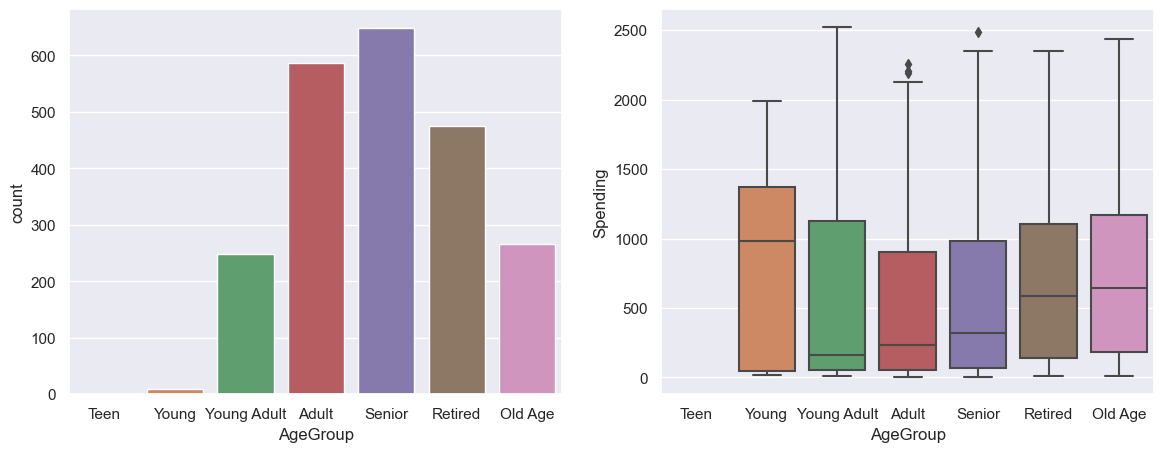

In [1052]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
#create boxplot in each subplot 
sns.countplot(df, x="AgeGroup",ax=axes[0]) 
sns.boxplot(data=df, x="AgeGroup", y="Spending", ax=axes[1])

In [12]:
 
import plotly.express as px
fig = px.scatter(df, x="Income", y="Spending")
fig.show()


* We observe different trends with respect to income. 
* Income is correlated with spending. 

#### Examine spending of data with null Income


In [ ]:
n_i = df[df['Income'].isnull()]

In [1069]:
n_i[['Income', 'Spending']].describe()

Income     Spending
count     0.0    24.000000
mean      NaN   487.875000
std       NaN   536.869291
min       NaN    18.000000
25%       NaN    46.750000
50%       NaN   262.000000
75%       NaN   722.000000
max       NaN  1679.000000

In [1109]:
df= df.dropna()

In [1079]:
df[['Income', 'Spending']].describe()

Income     Spending
count    2236.000000  2236.000000
mean    51884.118515   605.986583
std     21423.393551   601.865156
min      1730.000000     5.000000
25%     35502.500000    69.000000
50%     51025.500000   396.500000
75%     68275.750000  1045.500000
max    162397.000000  2525.000000

#### Plot the null values

<Axes: xlabel='Income', ylabel='Count'>

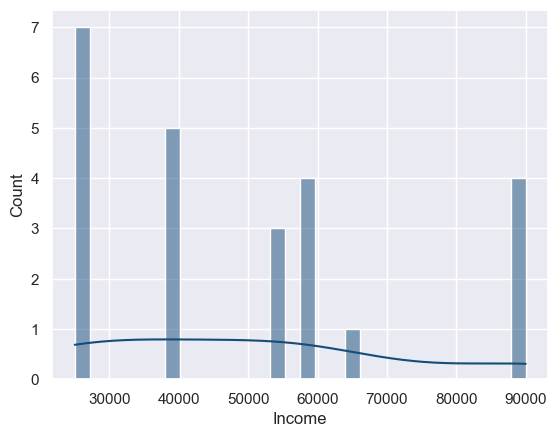

In [1127]:
sns.histplot(data=n_i, x='Income', bins=30, kde=True, color='#154c79')

* Based on the observation and analysis, asign income for spending ranges. 
#### Apply Filters.

In [1128]:
# Filters 
c1 = (n_i['Spending'] >= 0) & (n_i['Spending'] <= 69)
c2 = (n_i['Spending'] > 69) &  (n_i['Spending'] <= 250) 
c3 = (n_i['Spending'] > 250) & (n_i['Spending'] <= 500)
c4 = (n_i['Spending'] > 500) & (n_i['Spending'] <= 750) 
c5 = (n_i['Spending'] > 750) & (n_i['Spending'] <= 1000) 
c6 = (n_i['Spending'] > 1000) & (n_i['Spending'] <= 1750) 

n_i.loc[c1, 'Income'] = 20000 
n_i.loc[c2, 'Income'] = 40000
n_i.loc[c3, 'Income'] = 55000
n_i.loc[c4, 'Income'] = 58000 
n_i.loc[c5, 'Income'] = 70000
n_i.loc[c6, 'Income'] = 100000

In [1129]:
n_i['Income']

134      58000.0
262      20000.0
394      20000.0
449      58000.0
524      55000.0
588      40000.0
896      55000.0
994      20000.0
1093     20000.0
1182     58000.0
1210    100000.0
1309     20000.0
1512    100000.0
1555    100000.0
1690    100000.0
1801     40000.0
1855     20000.0
1860     40000.0
1877     40000.0
1964     70000.0
1980     20000.0
2136     55000.0
2162     40000.0
2167     58000.0
Name: Income, dtype: float64

##### Append the dataframe

In [1130]:
df._append(n_i)

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0     Graduation       Divorced  84835.0        0         0     6/16/14   
1     Graduation         Single  57091.0        0         0     6/15/14   
2     Graduation        Married  67267.0        0         1     5/13/14   
3     Graduation       Together  32474.0        1         1     5/11/14   
4     Graduation         Single  21474.0        1         0      4/8/14   
...          ...            ...      ...      ...       ...         ...   
1964      Master       Together  70000.0        0         0    11/23/13   
1980  Graduation       Together  20000.0        1         1      9/3/12   
2136  Graduation         Single  55000.0        0         1    10/18/13   
2162  Graduation         Single  40000.0        2         1      1/1/14   
2167  Graduation        Married  58000.0        0         1     8/11/13   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
0           0       189        104              379  ...             0   
1           0       464          5               64  ...             0   
2           0       134         11               59  ...             0   
3           0        10          0                1  ...             0   
4           0         6         16               24  ...             0   
...       ...       ...        ...              ...  ...           ...   
1964       87       445         37              359  ...             0   
1980       87        19          4               12  ...             0   
2136       95       264          0               21  ...             0   
2162       96        48          5               48  ...             0   
2167       96       231         65              196  ...             0   

      AcceptedCmp2  Response  Complain  Country  Age  Spending  \
0                0         1         0       SP   53      1190   
1                1         1         0       CA   62       577   
2                0         0         0       US   65       251   
3                0         0         0      AUS   56        11   
4                0         1         0       SP   34        91   
...            ...       ...       ...      ...  ...       ...   
1964             0         0         0      GER   50       985   
1980             0         0         0      AUS   65        45   
2136             0         0         0      AUS   68       450   
2162             0         0         0      AUS   72       124   
2167             0         0         0       CA   60       725   

      Marital_Situation  Has_child  Educational_years  
0                 Alone          0                 12  
1                 Alone          0                 12  
2             In couple          1                 12  
3             In couple          1                 12  
4                 Alone          1                 12  
...                 ...        ...                ...  
1964          In couple          0                 18  
1980          In couple          1                 12  
2136              Alone          1                 12  
2162              Alone          1                 12  
2167          In couple          1                 12  

[2260 rows x 31 columns]

<Axes: xlabel='Income', ylabel='Count'>

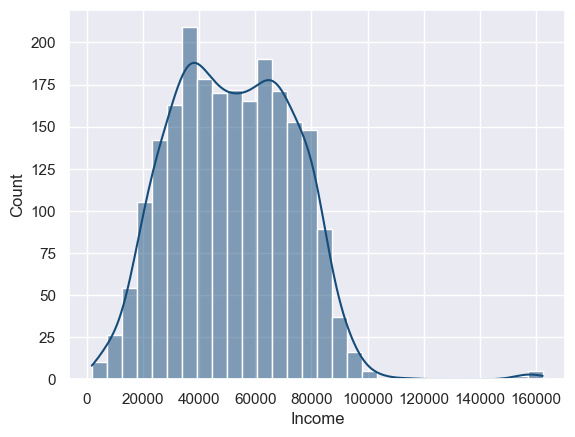

In [1131]:
sns.histplot(data=df, x='Income', bins=30, kde=True, color='#154c79')

In [1134]:
shapiro_wilk_test(df, ['Income'])


Fail to reject H0 due to lack of evidence under significance level 0.05
Income seem to be normally distributed


#### Experiment log transformation on other skewed columns

In [516]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

In [518]:
log_df = pd.DataFrame() 

In [519]:
with np.errstate(divide='ignore'):
    log_df['NumWebPurchases'] = np.log2(df['NumWebPurchases'])
    log_df['NumCatalogPurchases'] = np.log2(df['NumCatalogPurchases'])
    log_df['NumWebVisitsMonth'] = np.log2(df['NumWebVisitsMonth']) 
    

In [520]:
log_df

NumWebPurchases  NumCatalogPurchases  NumWebVisitsMonth
0            2.000000             2.000000           0.000000
1            2.807355             1.584963           2.321928
2            1.584963             1.000000           1.000000
3            0.000000                 -inf           2.807355
4            1.584963             0.000000           2.807355
...               ...                  ...                ...
2231         2.321928             1.000000           2.000000
2232         0.000000                 -inf           3.000000
2233         2.584963             0.000000           3.000000
2234         2.321928             2.000000           1.584963
2235         3.000000             2.321928           2.807355

[2236 rows x 3 columns]

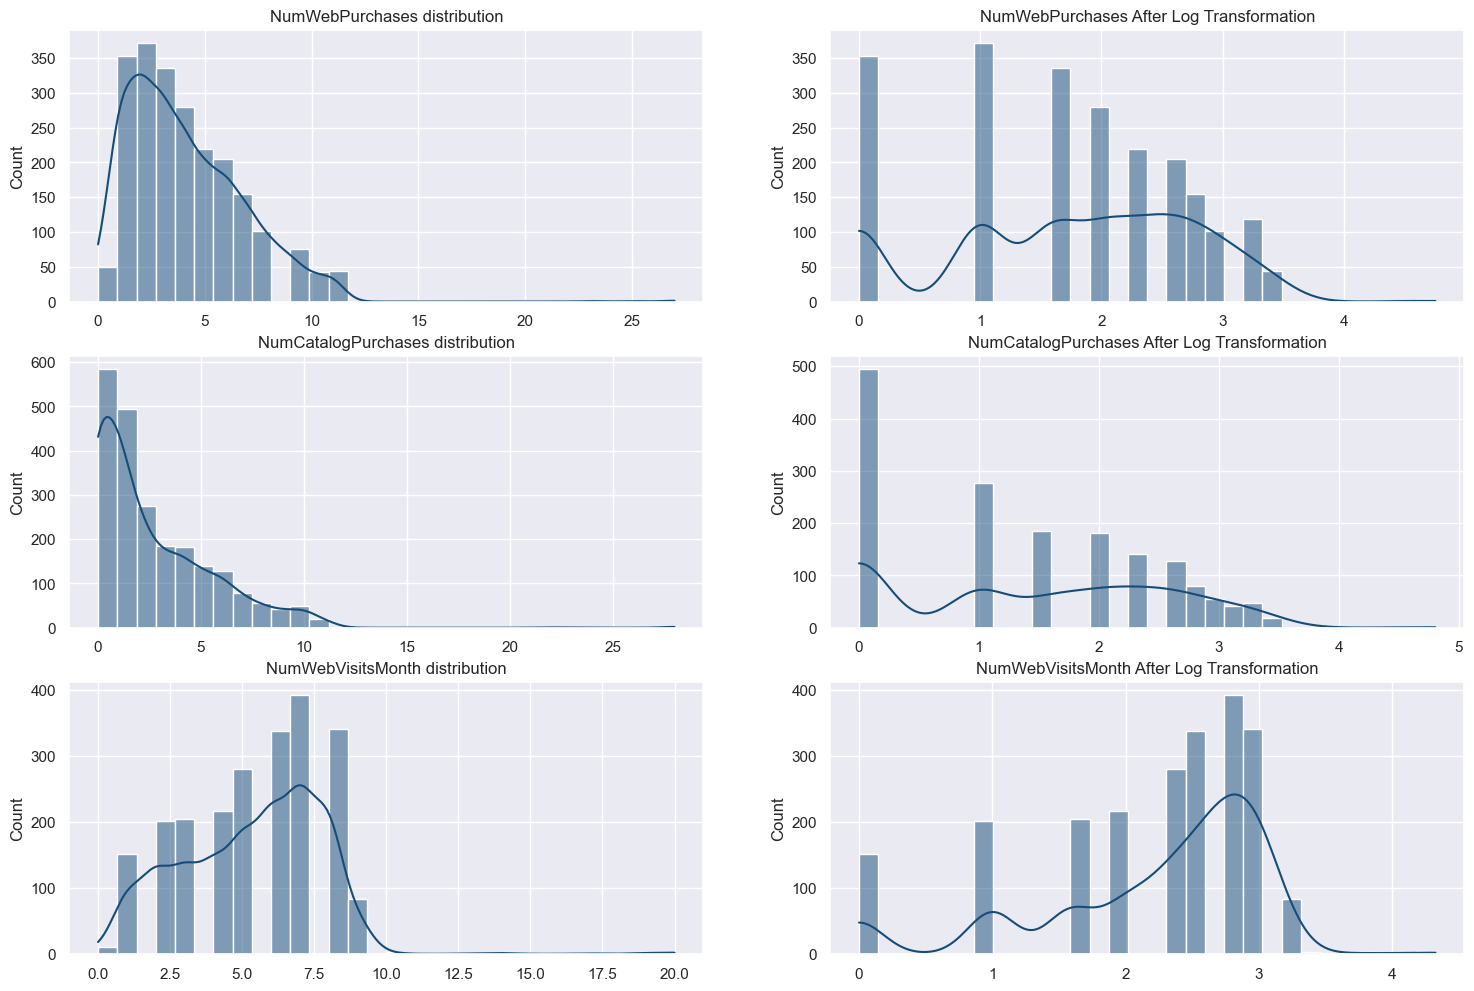

In [521]:
rows = len(log_df.columns)
colmns = 2

fig = plt.figure(1, (18, rows*4)) 
i=0 
for col in log_df.columns:
    
    i += 1
    ax3 = plt.subplot(rows, colmns,i)
    sns.histplot(data=df, x=col, bins=30, kde=True, color='#154c79')
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} distribution')
    
    i += 1 
    ax1 = plt.subplot(rows, colmns, i)
    sns.histplot(data=log_df, x=col, bins=30, kde=True, color='#154c79')
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} After Log Transformation')  

In [694]:
df[cols].head(3)             

Age   Income  Spending  MntWines  MntFruits  MntMeatProducts  \
0   53  84835.0      1190       189        104              379   
1   62  57091.0       577       464          5               64   
2   65  67267.0       251       134         11               59   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0                4                    4                  6                  1  
1                7                    3                  7                  5  
2                3                    2                  5                  2

### Quantile-Quantile Plot

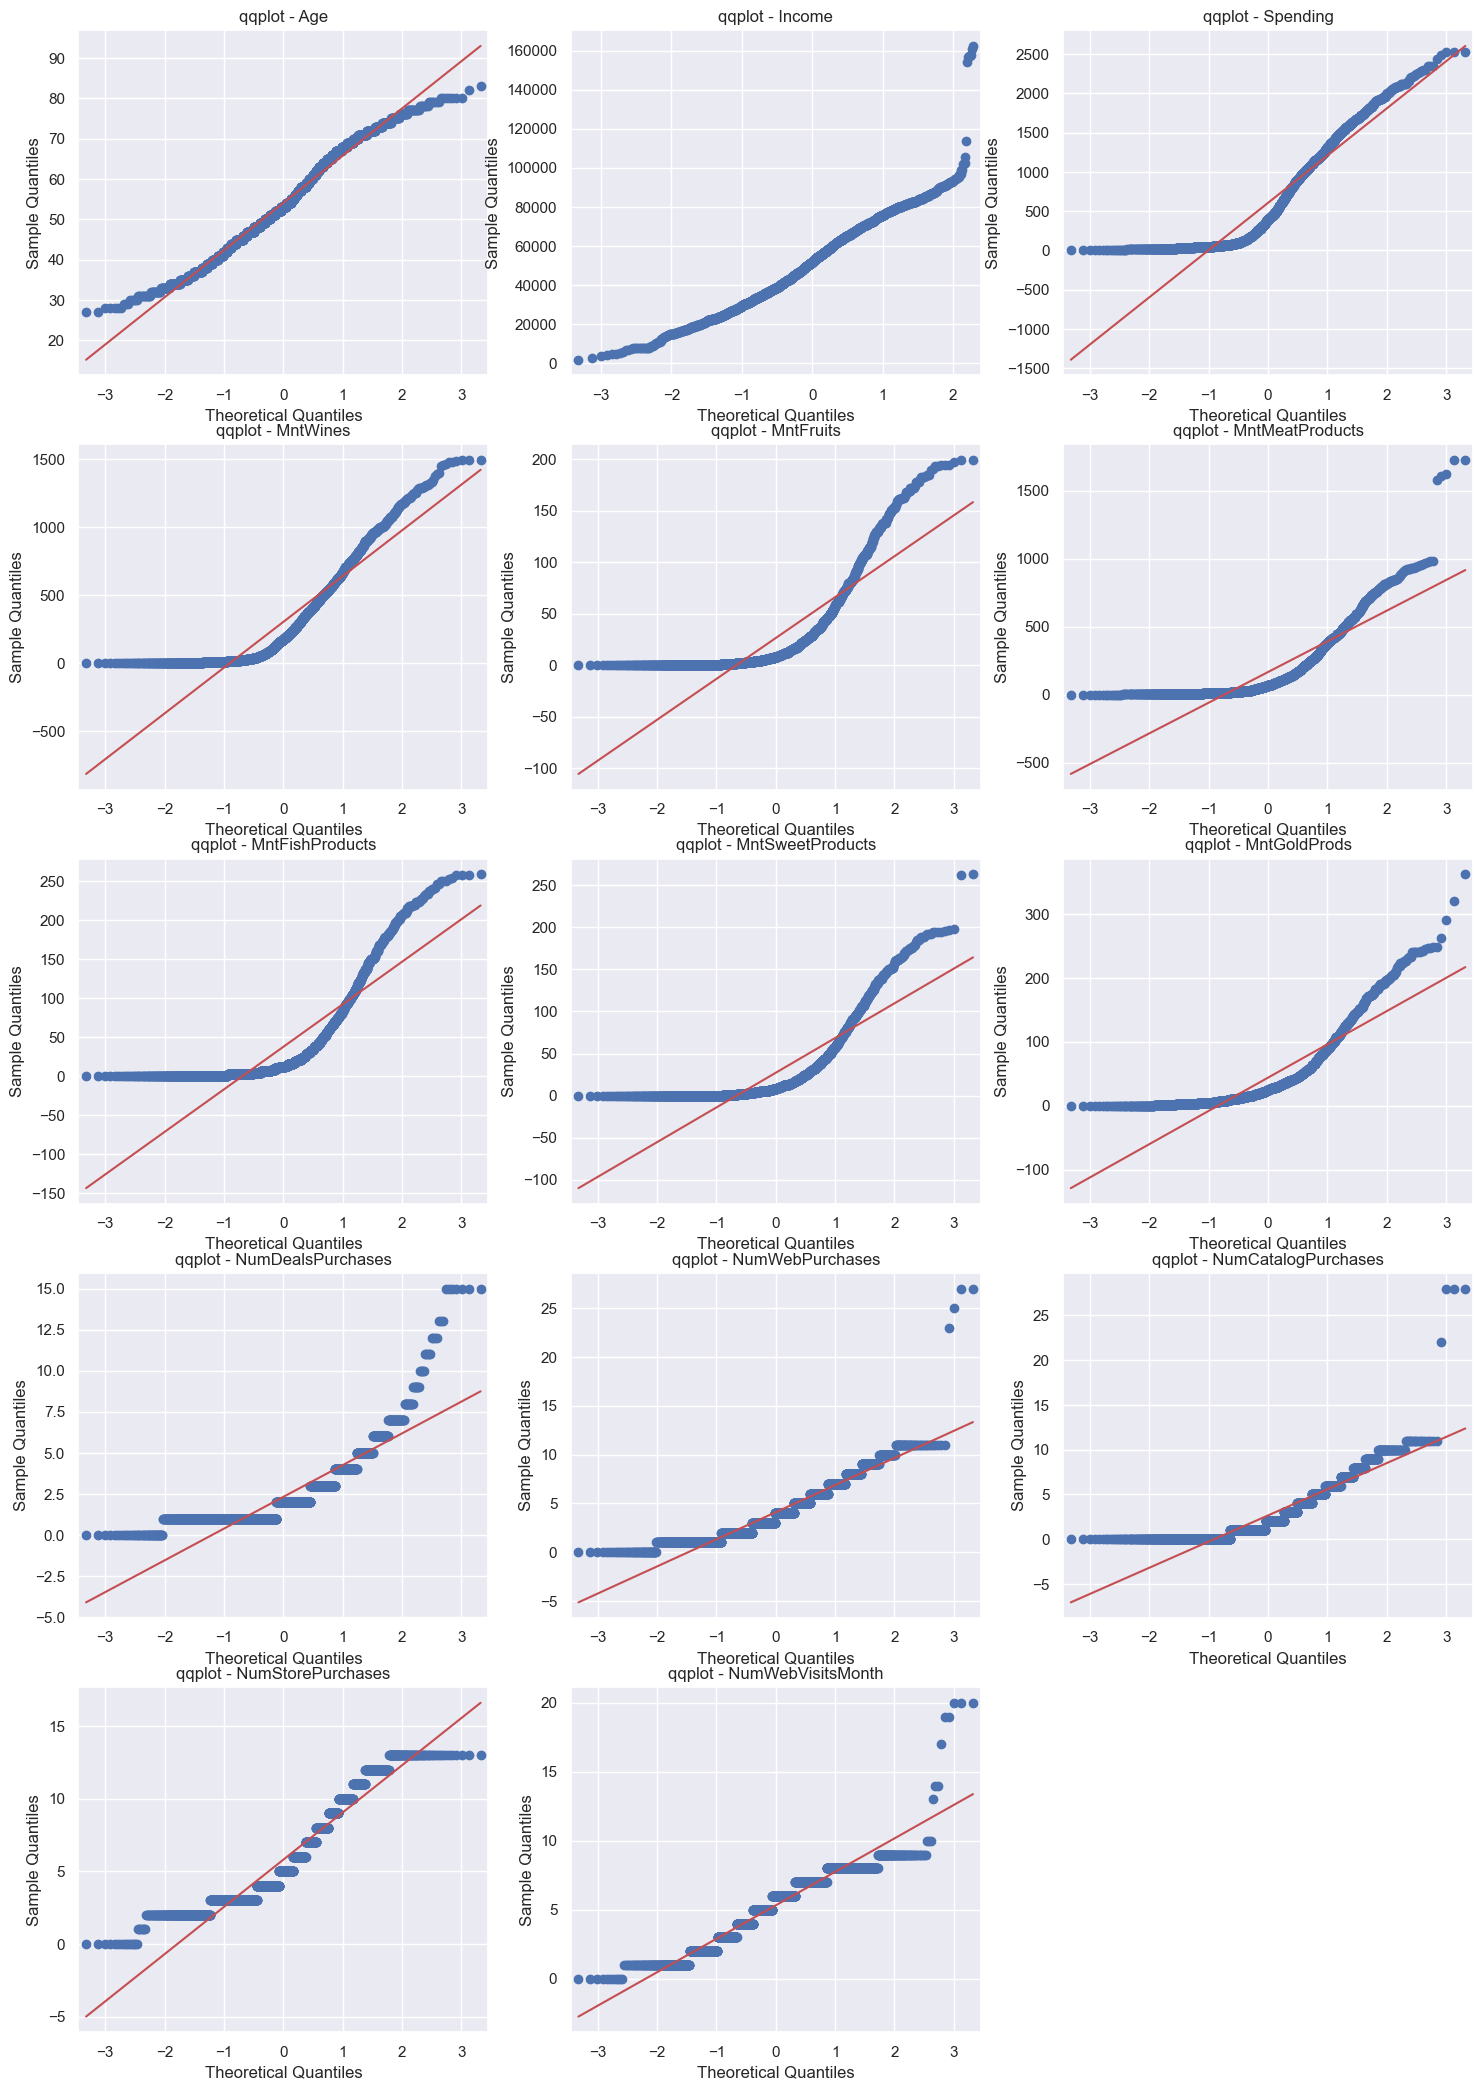

In [1135]:
fig = pyplot.figure(1, (18,26))

for i,num in enumerate(cols):
    ax = pyplot.subplot(5,3,i+1)
    qqplot(df[num], line= 's', ax=ax)
    ax.set_title(f'qqplot - {num}')


* NumWebPurchases, NumCatelogPurchases, NumStorePurchases, NumWebVisitsMonth appears to be normal. 
* Age though appears to be normal did have bimodal tendencies in the histogram plotted.  


#### Investigating normality through Shapiro-Wilk test: 

### Statistical Normality Test 

After few research on better ways to investigate normality, following was deduced from online discussion:  
    
* The Shapiro-Wilk test is really more appropriate for normality tests when the sample size is small, so at higher sample size, it is probably detecting even trivial departures from normality. The fact that the log of the variable leads to greater departure from normality tends to confirm that. Assessing the Q-Q plot and the skewness is also important. 

In [798]:
def shapiro_wilk_test(df:pd.DataFrame, cols:list, alpha = 0.05):
    for col in cols:
        _ , p = stats.shapiro(df[col])
        if p <=alpha:
             print(f'''\nRejected H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed''')
        else:
            print(f'''\nFail to reject H0 due to lack of evidence under significance level 
                     {alpha}\n{col} seem to be normally distributed''')
            
            

In [853]:
shapiro_wilk_test(df, cols)


Rejected H0 under significance level 0.05
Age doesn't seems to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
Income seem to be normally distributed

Rejected H0 under significance level 0.05
Spending doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
MntWines doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
MntFruits doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
MntMeatProducts doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
MntFishProducts doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
MntSweetProducts doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
MntGoldProds doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
NumDealsPurchases doesn't seems to be normally distributed

Rejected H0 under s

* All the columns have failed normality test accept Income. 
#### Let's examine normality for log transformed columns. 

In [221]:
shapiro_wilk_test(log_df, log_df.columns)


Fail to reject H0 due to lack of evidence under significance level 0.05
NumWebPurchases seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
NumCatalogPurchases seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
NumWebVisitsMonth seem to be normally distributed


* Log  transformation seems to be effective on columns.  

####  Log transform all the columns


In [582]:
cols_log = ['Age',
 'Spending',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [583]:
with np.errstate(divide='ignore'):
    df_log = pd.DataFrame(np.log2(df[cols_log]))

In [584]:
df_log.head()

Age   Spending  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  5.727920  10.216746  7.562242   6.700440         8.566054         6.794416   
1  5.954196   9.172428  8.857981   2.321928         6.000000         2.807355   
2  6.022368   7.971544  7.066089   3.459432         5.882643         3.906891   
3  5.807355   3.459432  3.321928       -inf         0.000000             -inf   
4  5.087463   6.507795  2.584963   4.000000         4.584963         3.459432   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          7.562242      7.768184                0.0         2.000000   
1              -inf      5.209453                0.0         2.807355   
2          1.000000      4.906891                0.0         1.584963   
3              -inf          -inf                0.0         0.000000   
4              -inf      5.087463                1.0         1.584963   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0             2.000000           2.584963           0.000000  
1             1.584963           2.807355           2.321928  
2             1.000000           2.321928           1.000000  
3                 -inf           1.000000           2.807355  
4             0.000000           1.000000           2.807355

In [243]:
shapiro_wilk_test(df_log, cols_log)


Rejected H0 under significance level 0.05
Age doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
Spending doesn't seems to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
MntWines seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
MntFruits seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
MntMeatProducts seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
MntFishProducts seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
MntSweetProducts seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
MntGoldProds seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
NumDealsPurchases seem to be normal

* Age, spending is not normally distributed. 
* Need to try with different transformation techniques.  

#### Boxcox transformation

In [247]:
df[['Age', 'Spending']].skew()

Age         0.092495
Spending    0.860174
dtype: float64

In [248]:
from scipy.special import boxcox1p

In [251]:
li = ['Age', 'Spending']
df_boxcox = df[li]

In [252]:
for i in li:                                       
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)      

In [254]:
df_boxcox.skew()

Age        -0.283033
Spending   -0.227150
dtype: float64

In [255]:
shapiro_wilk_test(df_boxcox, li)


Rejected H0 under significance level 0.05
Age doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
Spending doesn't seems to be normally distributed


##### As age  appears to be bimodal from histograms, let's analyze the bimodal graphs. 

## Bimodel Data 

In [256]:
from sklearn.neighbors import KernelDensity

In [265]:
age = df['Age'].to_numpy().reshape(-1, 1)

In [270]:
kd = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(age)

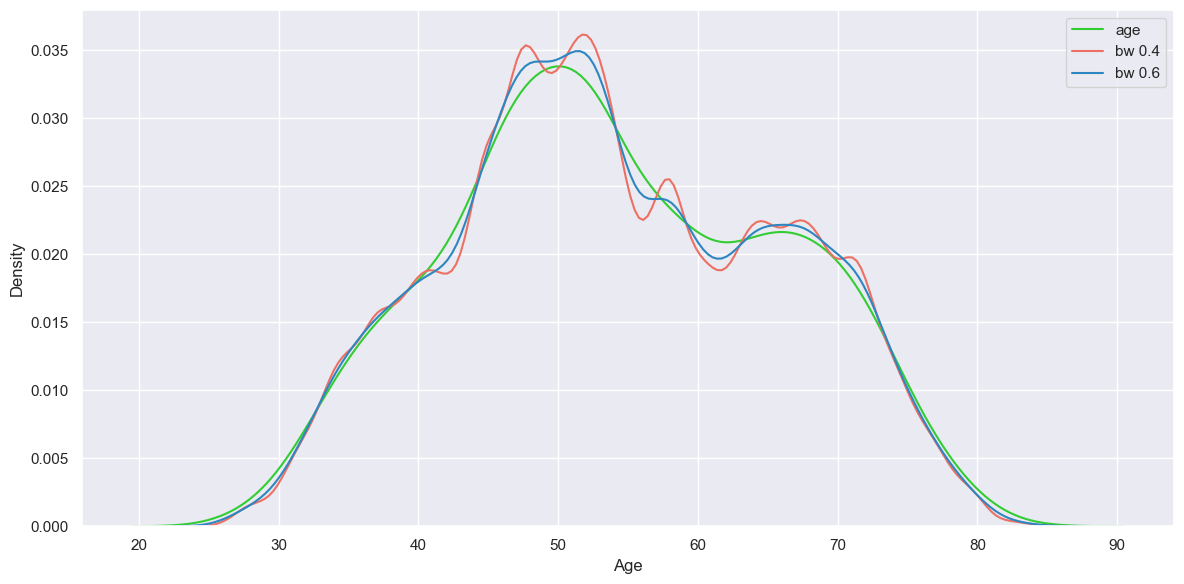

In [325]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df['Age'], color='limegreen',label='age', ax=ax)
sns.kdeplot(data=df['Age'], bw_adjust=.4, color='#EC7063',label='bw 0.4',ax=ax)
sns.kdeplot(data=df['Age'], bw_adjust=0.6, color='#2E86C1',label='bw 0.6', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

* Age is visually bimodal in nature


### Test if Income in 'Australia', 'India' and 'Canada' has same mean? 


#### Check for same Mean in 2 samples


As per <a href="https://blog.minitab.com/en/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test">minitab.com</a> ,  
* If the mean accurately represents the center of your distribution and your sample size is large enough, consider a <b>parametric test</b> because they are more powerful. 
* If the median better represents the center of your distribution, consider the <b>nonparametric test</b> even when you have a large sample.

In [367]:
mm_df = pd.DataFrame()
mm_df['mean'] = df[cols].mean()
mm_df['median'] = df[cols].median() 
mm_df['diff'] = (df[cols].mean() - df[cols].median())/df[cols].mean() * 100

In [368]:
mm_df

mean   median       diff
Age                     54.101968     53.0   2.036835
Income               51958.810579  51371.0   1.131301
Spending               605.986583    396.5  34.569508
MntWines               304.127460    174.0  42.787146
MntFruits               26.275939      8.0  69.553895
MntMeatProducts        166.983453     67.0  59.876264
MntFishProducts         37.536225     12.0  68.030883
MntSweetProducts        27.080501      8.0  70.458449
MntGoldProds            43.983005     24.0  45.433470
NumDealsPurchases        2.326029      2.0  14.016535
NumWebPurchases          4.087657      4.0   2.144420
NumCatalogPurchases      2.663238      2.0  24.903442
NumStorePurchases        5.795617      5.0  13.727911
NumWebVisitsMonth        5.318873      6.0 -12.805852

##### Age, income, NumWebPurchases has mean and median similar repesenting centre of the distribution. Thus parametric tests can be used. 
##### Non parametric test can be applied on other columns. 

### Non Parametric Tests. 

Non-parametric test (sometimes referred to as a distribution free test) does not assume anything about the underlying distribution (for example, that the data comes from a normal (parametric distribution). 

#### Advantages: 
* More statistical power when assumptions of parametric tests are violated.
* Assumption of normality does not apply.
* Small sample sizes are okay.
* They can be used for all data types, including ordinal, nominal and interval (continuous).
* Can be used with data that has outliers. 

Explanation referrence 
<a href="https://builtin.com/data-science/parametric-vs-nonparametric">here</a>

### Pearson Correlation  

* The Pearson correlation coefficient is just a normalized covariance between the two variables to give an interpretable score such that  Corrp(x,y)∈[−1,1]
* It can be used to summarize the strength of the linear relationship between two data samples.

(14.5, -0.5)

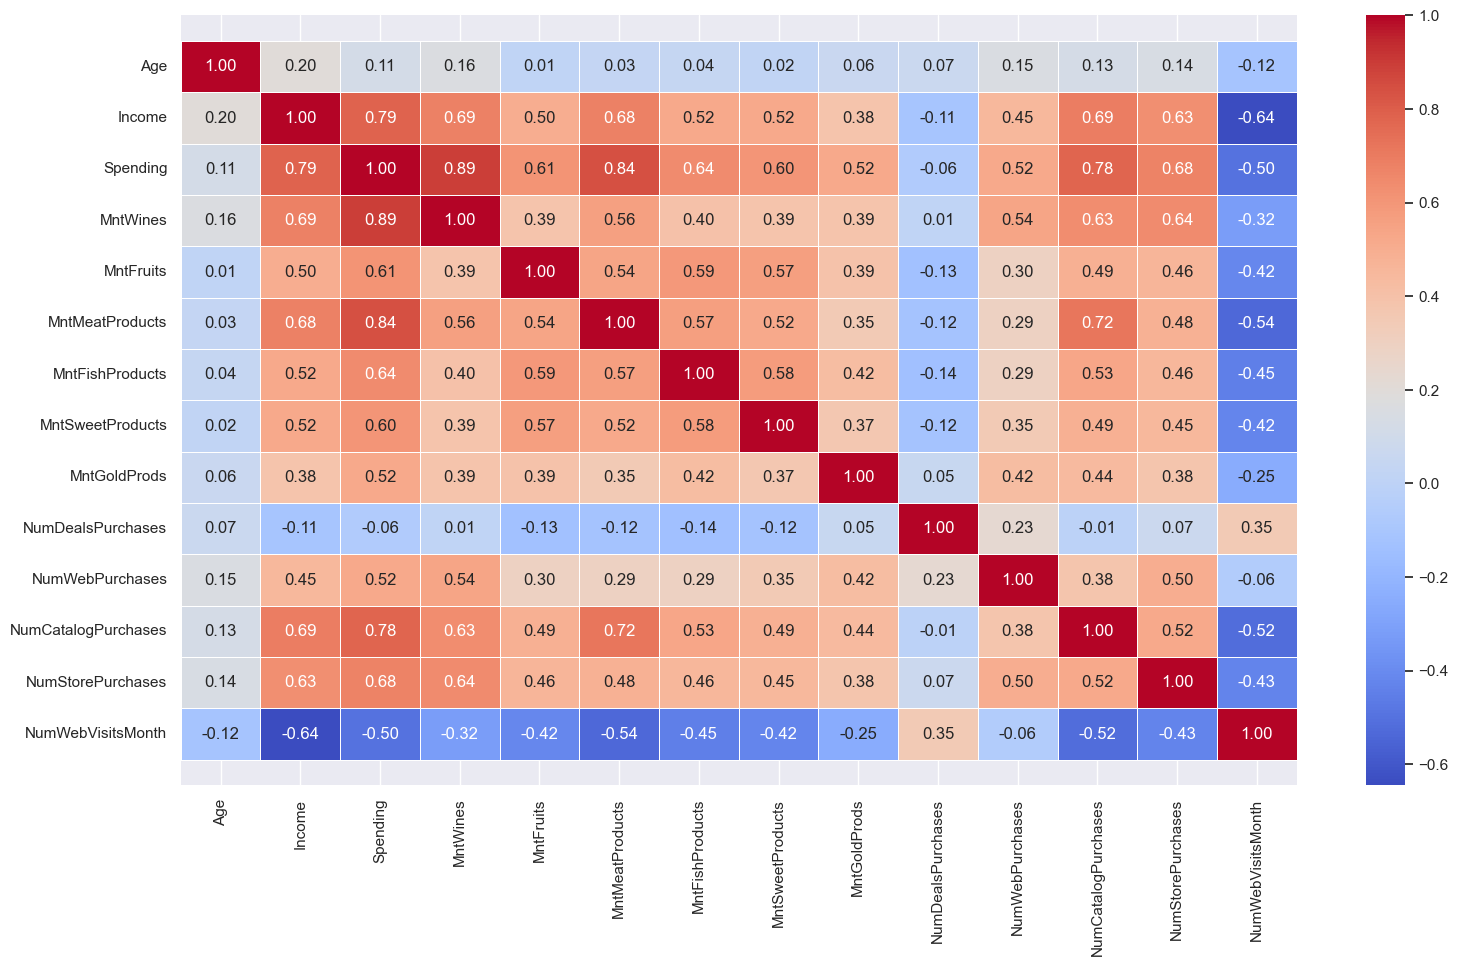

In [525]:
df_corr = df[cols]

corr_matrix =df_corr.corr()
fig, lax = plt.subplots(figsize =(18, 10))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                cmap = 'coolwarm',
                linewidths = 0.5,
                fmt =".2f",
                ); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

* We observe correlation between 'Spending' and 'Income'. 
* 'MntWines', 'MntMeatProducts' are correlated with 'Income'. 
* 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases' are highly correlated with spending. 
* 'MntMeatProducts', 'NumCatalogPurchases' are correlated. 

We will now test whether two samples has the same mean or not. For this we have two types of significance tests for two different conditions.  

### Test if Income of  'Australia', 'India' and 'Canada' has same mean

#### Parametric Statistical Significance Test

1. Student’s t-test - It tests whether the two independent normal distributed samples has the same mean or not.
2. Analysis of Variance Test (ANOVA) - It tests whether the two or more independent normal distributed samples has the same mean or not. 

ANOVA is same as t-test but for more than 2 variables. So either we can apply t-test pair-wise of apply ANOVA once. Also ANOVA only tells whether all samples are same or not, it doesn't quantify which samples differ or by how much.

#### Non-Parametric Statistical Significance Test 

1. Mann-Whitney U Test - Non-parameetric equivalent of Student's t-test.
2. Kruskal-Wallis H - Non-parameetric equivalent of ANOVA (it's for median).

We will apply appropriate test depending on the sample, i.e., if samples are normally distributed then parametric tests otherwise non-parametric tests.

In [372]:
df['Country'].value_counts()

Country
SP     1094
SA      335
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: count, dtype: int64

#### Check for normal distribution 

In [387]:
shapiro_wilk_test(df[df['Country']=='AUS'], ['Income'])


Fail to reject H0 due to lack of evidence under significance level 0.05
Income seem to be normally distributed


In [386]:
shapiro_wilk_test(df[df['Country']=='IND'], ['Income'])


Fail to reject H0 due to lack of evidence under significance level 0.05
Income seem to be normally distributed


In [388]:
shapiro_wilk_test(df[df['Country']=='CA'], ['Income'])


Fail to reject H0 due to lack of evidence under significance level 0.05
Income seem to be normally distributed


#### H0 : Customer Income of Australia, India and Canada has same sample mean.  α = 0.05      


In [391]:
ALPHA = 0.05

In [527]:
_, p = stats.f_oneway(df[df['Country']=='AUS'].Income, df[df['Country']=='IND'].Income, df[df['Country']=='CA'].Income)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.') 

Fail to Reject H0 under 5.0% significance, Same distributions.


* Customer income of the 3 countries has the same mean. 

### Test whether wine purchase across Australia, India and Canada has the same mean

In [393]:
shapiro_wilk_test(df[df['Country']=='AUS'], ['MntWines'])


Rejected H0 under significance level 0.05
MntWines doesn't seems to be normally distributed


In [394]:
shapiro_wilk_test(df[df['Country']=='IND'], ['MntWines'])


Rejected H0 under significance level 0.05
MntWines doesn't seems to be normally distributed


In [395]:
shapiro_wilk_test(df[df['Country']=='CA'], ['MntWines'])


Rejected H0 under significance level 0.05
MntWines doesn't seems to be normally distributed


* The samples are not normally distributed. 
* Therfore apply non-parametric test. 
### Kruskal-Wallis Test

#### H0: Sample distributions are equal for Wine purchases across region.        α=0.05

In [397]:
_, p = stats.kruskal(df[df.Country=='AUS'].MntWines, df[df.Country=='IND'].MntWines, df[df.Country=='CA'].MntWines)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Fail to Reject H0 under 5.0% significance, Same distributions.


* Wine purchases across Australia, India and Canada are equal. 

## Is there association between Marital Situation and Income? 

Solution:  

### Point-Biserial Correlation 

It is a special case of the Pearson Correlation and is used when you want to measure the relationship between a continuous variable and a dichotomous variable, or one that has two values (i.e. male/female, yes/no, true/false).

<b>Assumptions for point biserial correlation:</b> 

* <b>No outliers (continuous variable)</b> - assessed through a visual examination of the scatterplot etc
* Approximately <b>normally</b> distributed (continuous variable)
* <b>Homogeneity of variance</b> of the continuous variable between both groups of the dichotomous variable - assessed through <b>Levene's Test</b> 



### Examination of outliers  and normality




<Axes: xlabel='Income', ylabel='Count'>

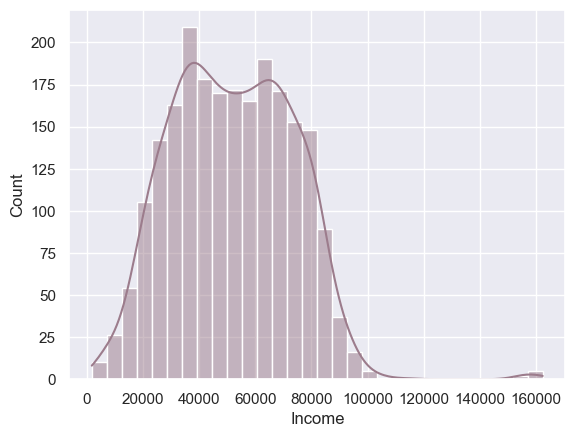

In [1137]:
sns.histplot(data=df, x='Income', bins=30, kde=True, color='#9c7c8c')

* Income does not have extreme outlers. 
* Income is normally distributed. 

In [914]:
df['Income'] = df['Income'].dropna()

<Axes: xlabel='Income', ylabel='Count'>

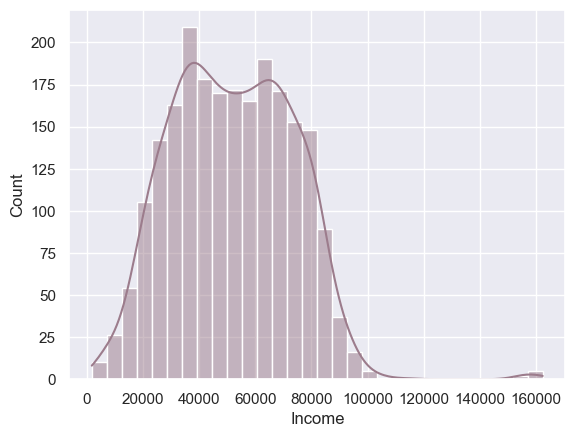

In [911]:
sns.histplot(data=df, x='Income', bins=30, kde=True, color='#9c7c8c')

### Check for Homogenity: Levene's Test 

In [398]:
from scipy.stats import levene 

In [606]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Spending',
       'Marital_Situation', 'Has_child', 'Educational_years',
       'MntGoldProds_log', 'MntWines_log'],
      dtype='object')

In [609]:
df['Teenhome'].value_counts()

Teenhome
0    1155
1    1029
2      52
Name: count, dtype: int64

In [528]:
from sklearn import preprocessing 
ohe = preprocessing.OneHotEncoder()

In [529]:

ms = pd.get_dummies(df['Marital_Situation'], columns=['Marital_Situation'], dtype='int')

In [530]:
ms.head()

Alone  In couple
0      1          0
1      1          0
2      0          1
3      0          1
4      1          0

In [614]:
al_df = df[df['Marital_Situation']== 'Alone']['Income'] 
ic_df = df[df['Marital_Situation']== 'In couple']['Income']             

In [621]:
al_df.head(3)

0    84835.0
1    57091.0
4    21474.0
Name: Income, dtype: float64

#### The null hypothesis for Levene’s test is that the variance among groups is equal

In [622]:
w_stats, p_value = levene(al_df,ic_df, 
                          center='median') 

if p_value > ALPHA:
    print("We do not reject the null hypothesis")
else:
    print("Reject the Null Hypothesis")                              

We do not reject the null hypothesis


* Thus variance among 'alone' and 'in couple'  marital situation groups across Wine purchases is equal. 
* Thus Assumption "homogeneity of variance of the continuous variable between both groups of the dichotomous variable" is verified 
* Therefore apply pointbiserial 

### Point-Biserial Correlation 

The hypotheses for point biserial correlation: 

<b>Null hypothesis:</b> The correlation coefficient r = 0 (There is no correlation)<br>
<b>Alternative hypothesis:</b> The correlation coefficient r ≠ 0 (There is a correlation)

In [99]:
from scipy.stats import pointbiserialr

In [988]:
for col in ms:
    correlation, p_value = pointbiserialr(ms[col], df['Income'])
    print(f'{correlation:.4f}: Point-Biserial Correlation 
                           for {col} with p-value {p_value:.4f}') 

0.0034: Point-Biserial Correlation for Alone with p-value 0.8715
-0.0034: Point-Biserial Correlation for In couple with p-value 0.8715



##### No association between marital status and income. P value greater than 0.05. Thus null hypothesis is not rejected. 

### Is age group and number of Web visits per month independent?


Solution: 
* We need to test Hypothesis for Independence between two categorical variables

In [473]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [450]:
df['Age'].unique()

array([53, 62, 65, 56, 34, 69, 76, 44, 64, 42, 54, 46, 63, 57, 47, 58, 67,
       48, 52, 37, 51, 49, 33, 36, 39, 55, 68, 40, 50, 45, 71, 61, 59, 41,
       60, 66, 43, 78, 74, 75, 70, 77, 38, 31, 79, 72, 35, 73, 29, 30, 32,
       27, 28, 80, 82, 83], dtype=int64)

In [477]:
bins = [0,20,30,40,50,60,70,100]
labels = ['Teen', 'Young', 'Young Adult', 'Adult', 'Senior', 'Retired', 'Old Age']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

### Pearson's Chi-square test
The Chi-square statistic is a non-parametric statistic tool designed to analyze group differences when the dependent variable is measured at a nominal level 
Assumptions: 
1. The test becomes invalid if any of the expected values are below 5
2. The p value calculated is not exact but approximate and converges to exact on increasing data(so not good for small sample size)
3. The number of observations must be 20+

In [484]:
observed_values = pd.crosstab(df['AgeGroup'], df['NumWebVisitsMonth'])
observed_values

NumWebVisitsMonth  0   1   2   3   4   5    6    7    8   9   10  13  14  17  \
AgeGroup                                                                       
Young               0   1   2   1   0   2    3    0    0   1   0   0   0   0   
Young Adult         0  28  20  20  22  18   31   43   48  17   1   0   0   0   
Adult               4  27  44  56  52  68   92  106  103  33   0   1   0   1   
Senior              2  30  49  49  58  88  103  139  107  19   2   0   2   0   
Retired             2  37  55  47  52  70   79   70   52   9   0   0   0   0   
Old Age             3  29  32  32  33  34   31   35   32   4   0   0   0   0   

NumWebVisitsMonth  19  20  
AgeGroup                   
Young               0   0  
Young Adult         1   0  
Adult               0   0  
Senior              0   1  
Retired             1   1  
Old Age             0   1

* Expected cell counts are small, it is better to use an exact test as the chi-squared test is no longer a good approximation in such cases. 


### Fisher’s exact test 

* Fisher’s exact test is used to determine whether there is a significant association between two categorical variables in a contingency table. 
*  Fisher’s exact test is an alternative to Pearson’s chi-squared test for independence. 
* A general recommendation is to use Fisher’s exact test- instead of the chi-squared test - whenever more than 20 % of cells in a contingency table have expected frequencies < 5.

In [485]:
chi2, p, dof, expected_values = stats.chi2_contingency(observed_values) 
print(chi2, p, dof,"\n", expected_values)

134.30750457213958 3.135219316047695e-05 75 
 [[4.91949911e-02 6.79785331e-01 9.03398927e-01 9.16815742e-01
  9.70483005e-01 1.25223614e+00 1.51610018e+00 1.75760286e+00
  1.52951699e+00 3.71198569e-01 1.34168157e-02 4.47227191e-03
  8.94454383e-03 4.47227191e-03 8.94454383e-03 1.34168157e-02]
 [1.22495528e+00 1.69266547e+01 2.24946333e+01 2.28287120e+01
  2.41650268e+01 3.11806798e+01 3.77508945e+01 4.37643113e+01
  3.80849732e+01 9.24284436e+00 3.34078712e-01 1.11359571e-01
  2.22719141e-01 1.11359571e-01 2.22719141e-01 3.34078712e-01]
 [2.88774597e+00 3.99033989e+01 5.30295170e+01 5.38170841e+01
  5.69673524e+01 7.35062612e+01 8.89950805e+01 1.03171288e+02
  8.97826476e+01 2.17893560e+01 7.87567084e-01 2.62522361e-01
  5.25044723e-01 2.62522361e-01 5.25044723e-01 7.87567084e-01]
 [3.19275492e+00 4.41180680e+01 5.86305903e+01 5.95013417e+01
  6.29843470e+01 8.12701252e+01 9.83949016e+01 1.14068426e+02
  9.92656530e+01 2.40907871e+01 8.70751342e-01 2.90250447e-01
  5.80500894e-01 2.90

In [488]:
if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `Age` & `Web Visits Per Month` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `` & `Country` are independent.')

Rejected H0 under significance level 0.05 `Age` & `Web Visits Per Month` are dependent.


##### Thus, Number of Web Visits Per Month are dependent on Age of the customers. It is evident that different generations have different intensity of using technology. 


### References

Statistical Concepts: https://www.kaggle.com/code/gauravsharma99/statistical-analysis-on-mpg-data/notebook#Linear-Association-(Pearson's-Correlation) <br>
https://ekamperi.github.io/mathematics/2020/05/06/normality-tests-in-statistics.html 
<br> 
https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517 <br>
https://builtin.com/data-science/parametric-vs-nonparametric
<br>
https://stats.stackexchange.com/questions/417437/interpreting-shapiro-wilk-test-skewness-and-kurtosis-in-the-light-of-a-qqplot-a 
<br>
https://towardsdatascience.com/modality-tests-and-kernel-density-estimations-3f349bb9e595 
<br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4638176/#:~:text=Multiple%20imputation%20fills%20in%20missing,variables%20in%20the%20data%20set. 
<br> 
https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-017-0442-1 
<br>
https://blog.minitab.com/en/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test 
<br>
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/point-biserial-correlation/ 
<br> 
https://www.researchgate.net/post/Transform_and_use_a_parametric_test_or_use_non_parametric_test 
<br> 
https://www.statology.org/ 
<br>
https://datatab.net/tutorial/ 
<br>
https://cyfar.org/what-data-analysis 